In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [2]:
data = pd.read_csv('final_with_covid_AS.csv')
data.head()

,CountCases,BedDys,BeddystoCC,Severity,DiedCases,DiedBdDys,Hsptlsns,April,August,December,...,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,CovidPrd
0,17,133,7.823529,75,4,9,13,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,13,372,28.615385,63,4,34,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,106,13.250000,48,4,13,4,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,45,218,4.844444,153,3,24,42,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,24,238,9.916667,90,3,8,21,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [3]:
year = ['Y2011', 'Y2012', 'Y2013', 'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018', 'Y2019', 'Y2020', 'Y2021']
mounth = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

for user in year:
    for counter_party in mounth:
        filtered_data = data[(data[user] == 1) & (data[counter_party] == 1)]
        result = filtered_data['BeddystoCC'].mean()
        print(f"Sum of Hsptlsns for {user} and {counter_party}: {result}")

Sum of Hsptlsns for Y2011 and January: 5.286504238584416
Sum of Hsptlsns for Y2011 and February: 5.599936708595855
Sum of Hsptlsns for Y2011 and March: 4.867281773062955
Sum of Hsptlsns for Y2011 and April: 5.2751995016412225
Sum of Hsptlsns for Y2011 and May: 5.610305691734941
Sum of Hsptlsns for Y2011 and June: 7.0161510105130205
Sum of Hsptlsns for Y2011 and July: 4.675141168708108
Sum of Hsptlsns for Y2011 and August: 5.484783742351283
Sum of Hsptlsns for Y2011 and September: 5.299722938109415
Sum of Hsptlsns for Y2011 and October: 5.048382857394402
Sum of Hsptlsns for Y2011 and November: 4.9264416346277375
Sum of Hsptlsns for Y2011 and December: 4.338420855124379
Sum of Hsptlsns for Y2012 and January: 5.053939432626597
Sum of Hsptlsns for Y2012 and February: 5.111629973023438
Sum of Hsptlsns for Y2012 and March: 4.351658949992463
Sum of Hsptlsns for Y2012 and April: 4.306524368091134
Sum of Hsptlsns for Y2012 and May: 5.720861511295812
Sum of Hsptlsns for Y2012 and June: 4.7473827

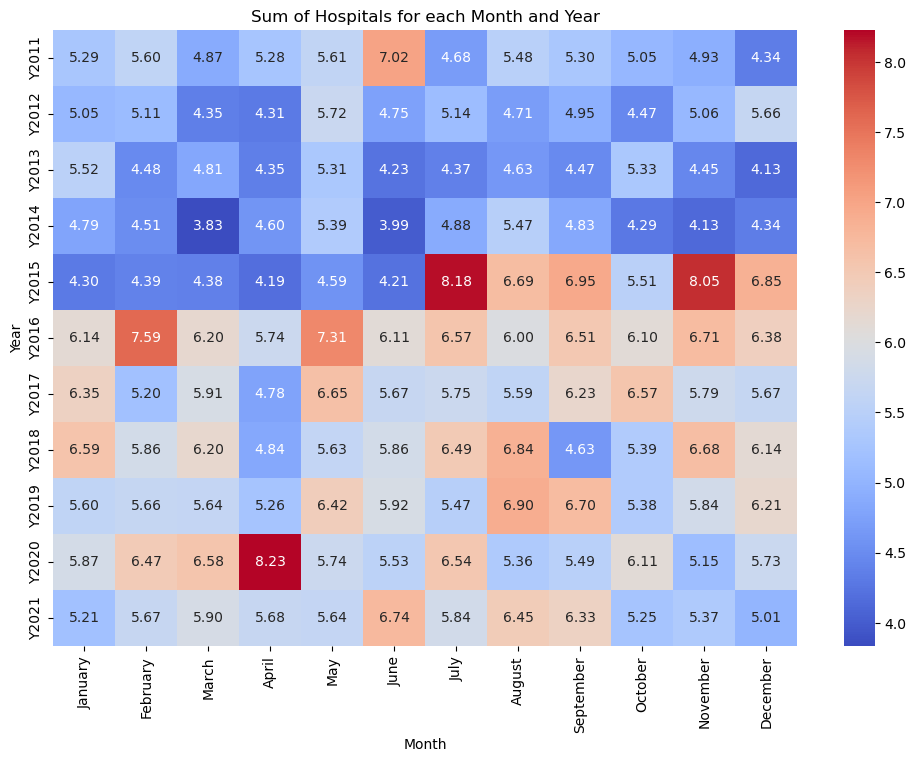

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = np.array([
    [5.286504238584416, 5.599936708595855, 4.867281773062955, 5.2751995016412225, 5.610305691734941, 7.0161510105130205, 4.675141168708108, 5.484783742351283, 5.299722938109415, 5.048382857394402, 4.9264416346277375, 4.338420855124379],
    [5.053939432626597, 5.111629973023438, 4.351658949992463, 4.306524368091134, 5.720861511295812, 4.747382767527559, 5.135196939953001, 4.705117147489899, 4.947166443654821, 4.466599247157895, 5.064552361818641, 5.661895681377451],
    [5.5180336173333355, 4.476812579197944, 4.8144597249591845, 4.351116370954216, 5.311029042334185, 4.232993670495, 4.371873546387409, 4.6306761028989625, 4.473758217793187, 5.327160952711363, 4.451714491049222, 4.130503871145631],
    [4.788230352510588, 4.512907540092909, 3.8339316355336526, 4.598677315084158, 5.3890991521654685, 3.9906163915621895, 4.8762754079511, 5.465301042380836, 4.833048285348958, 4.291210312665061, 4.128502339812659, 4.34366711977],
    [4.302096641119719, 4.385245674044503, 4.382842967673809, 4.186907695478972, 4.588097428659421, 4.213499278990073, 8.182446300965333, 6.69103510964532, 6.9458394280175, 5.513462495881068, 8.054951105513316, 6.849368190398034],
    [6.1412506257122645, 7.594015757799019, 6.196575175248816, 5.743828086291573, 7.3140804946795175, 6.111105752348371, 6.569034980273903, 5.996565637386306, 6.513194933789743, 6.103552837899522, 6.709042672136585, 6.376397069108046],
    [6.349732609615763, 5.19716025628741, 5.91476135125499, 4.777806076342925, 6.648142351322351, 5.672410517753622, 5.746361843309178, 5.587219738458763, 6.226032380596618, 6.570397153275362, 5.785934645764563, 5.667992601591423],
    [6.594055344432764, 5.856985089323603, 6.204697874282406, 4.842714307845411, 5.63381544198848, 5.855223488519362, 6.488739944041975, 6.839172214710998, 4.633030587363859, 5.393766783784542, 6.681292987932559, 6.144254500267303],
    [5.59622270192512, 5.66015286335971, 5.636561058731653, 5.256411406133787, 6.423612816763852, 5.917801554528821, 5.472099729046404, 6.8978565750290555, 6.703560905631326, 5.379179575437498, 5.840840192464114, 6.209004222859607],
    [5.873285482611247, 6.465059663651334, 6.577937758095922, 8.228002766494564, 5.740316152024632, 5.5348550170272945, 6.537864139379397, 5.363513873972222, 5.4864106663244545, 6.107624463598573, 5.153107518605991, 5.725671410695962],
    [5.2058956862768495, 5.671654271475001, 5.902684910506945, 5.67774821978161, 5.642720044723897, 6.737847953441246, 5.8353504957330085, 6.453109554041564, 6.325839202193154, 5.245897016560464, 5.366264190358025, 5.007747249103116]
])

plt.figure(figsize=(12, 8))
sns.heatmap(data, cmap="coolwarm", annot=True, fmt='.2f', xticklabels=[
            'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], yticklabels=[f'Y{year}' for year in range(2011, 2022)])
plt.xlabel('Month')
plt.ylabel('Year')
plt.title('Sum of Hospitals for each Month and Year')
plt.show()


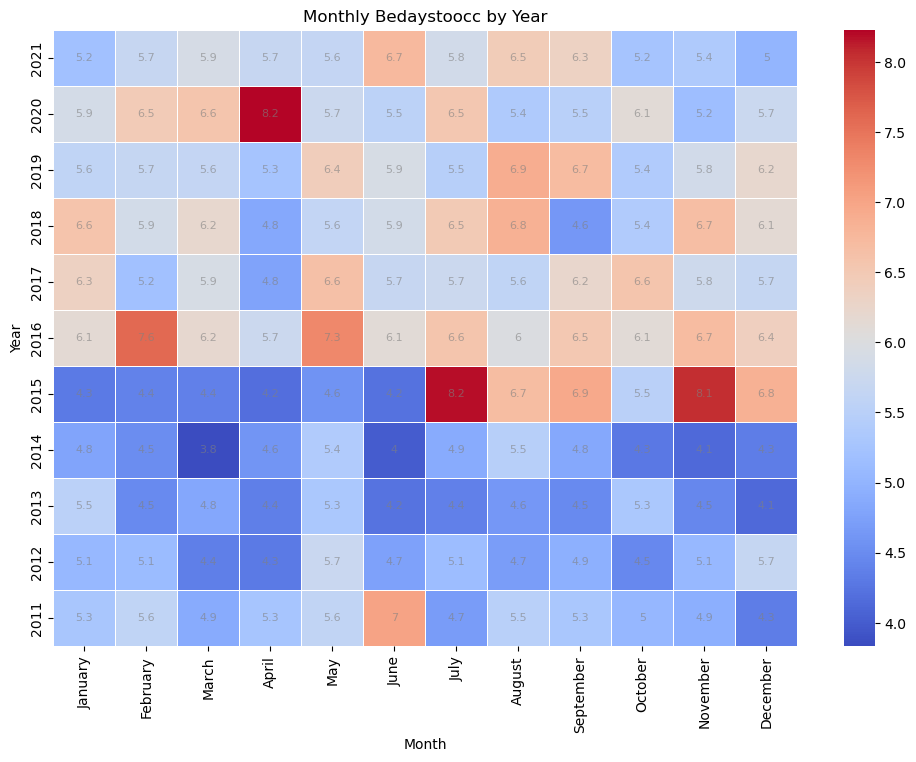

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    "January": [5.286504238584416, 5.053939432626597, 5.5180336173333355, 4.788230352510588, 4.302096641119719, 6.1412506257122645, 6.349732609615763, 6.594055344432764, 5.59622270192512, 5.873285482611247, 5.2058956862768495],
    "February": [5.599936708595855, 5.111629973023438, 4.476812579197944, 4.512907540092909, 4.385245674044503, 7.594015757799019, 5.19716025628741, 5.856985089323603, 5.66015286335971, 6.465059663651334, 5.671654271475001],
    "March": [4.867281773062955, 4.351658949992463, 4.8144597249591845, 3.8339316355336526, 4.382842967673809, 6.196575175248816, 5.91476135125499, 6.204697874282406, 5.636561058731653, 6.577937758095922, 5.902684910506945],
    "April": [5.2751995016412225, 4.306524368091134, 4.351116370954216, 4.598677315084158, 4.186907695478972, 5.743828086291573, 4.777806076342925, 4.842714307845411, 5.256411406133787, 8.228002766494564, 5.67774821978161],
    "May": [5.610305691734941, 5.720861511295812, 5.311029042334185, 5.3890991521654685, 4.588097428659421, 7.3140804946795175, 6.648142351322351, 5.63381544198848, 6.423612816763852, 5.740316152024632, 5.642720044723897],
    "June": [7.0161510105130205, 4.747382767527559, 4.232993670495, 3.9906163915621895, 4.213499278990073, 6.111105752348371, 5.672410517753622, 5.855223488519362, 5.917801554528821, 5.5348550170272945, 6.737847953441246],
    "July": [4.675141168708108, 5.135196939953001, 4.371873546387409, 4.8762754079511, 8.182446300965333, 6.569034980273903, 5.746361843309178, 6.488739944041975, 5.472099729046404, 6.537864139379397, 5.8353504957330085],
    "August": [5.484783742351283, 4.705117147489899, 4.6306761028989625, 5.465301042380836, 6.69103510964532, 5.996565637386306, 5.587219738458763, 6.839172214710998, 6.8978565750290555, 5.363513873972222, 6.453109554041564],
    "September": [5.299722938109415, 4.947166443654821, 4.473758217793187, 4.833048285348958, 6.9458394280175, 6.513194933789743, 6.226032380596618, 4.633030587363859, 6.703560905631326, 5.4864106663244545, 6.325839202193154],
    "October": [5.048382857394402, 4.466599247157895, 5.327160952711363, 4.291210312665061, 5.513462495881068, 6.103552837899522, 6.570397153275362, 5.393766783784542, 5.379179575437498, 6.107624463598573, 5.245897016560464],
    "November": [4.9264416346277375, 5.064552361818641, 4.451714491049222, 4.128502339812659, 8.054951105513316, 6.709042672136585, 5.785934645764563, 6.681292987932559, 5.840840192464114, 5.153107518605991, 5.366264190358025],
    "December": [4.338420855124379, 5.661895681377451, 4.130503871145631, 4.34366711977, 6.849368190398034, 6.376397069108046, 5.667992601591423, 6.144254500267303, 6.209004222859607, 5.725671410695962, 5.007747249103116]
}

df = pd.DataFrame(data, index=[2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])
df = df.sort_index()

df = df[::-1]

plt.figure(figsize=(12, 8))
sns.heatmap(df, annot=True, cmap="coolwarm", linewidths=.5,annot_kws={"size": 8, "color": "gray", "alpha": 0.6})
plt.title('Monthly Bedaystoocc by Year')
plt.ylabel('Year')
plt.xlabel('Month')
plt.show()



In [6]:
year = ['Y2011', 'Y2012', 'Y2013', 'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018', 'Y2019', 'Y2020', 'Y2021']
mounth = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

for user in year:
    for counter_party in mounth:
        filtered_data = data[(data[user] == 1) & (data[counter_party] == 1)]
        result = filtered_data['BeddystoCC'].sum()
        print(f"Sum of Hsptlsns for {user} and {counter_party}: {result}")

KeyError: 'Y2011'

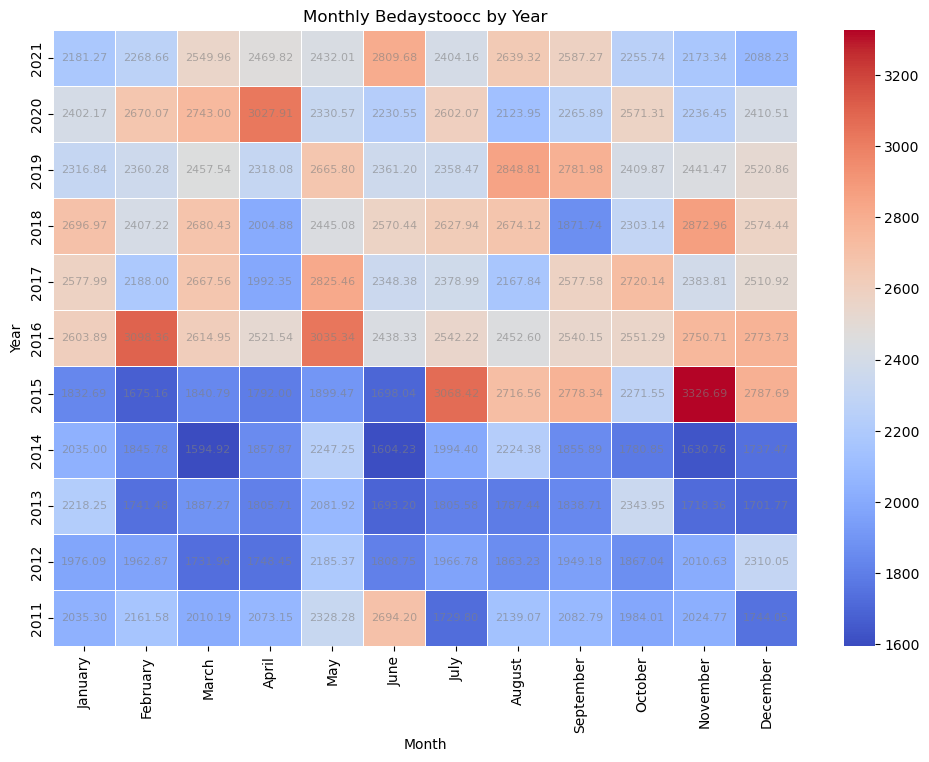

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    "January": [2035.304131855, 1976.090318157, 2218.249514168, 2034.997899817, 1832.693169117, 2603.890265302, 2577.991439504, 2696.9686358729996, 2316.836198597, 2402.173762388, 2181.27029255],
    "February": [2161.575569518, 1962.8659096409997, 1741.480093308, 1845.779183898, 1675.1638474850001, 3098.358429182, 2188.004467897, 2407.220871712, 2360.2837440209996, 2670.069641088, 2268.66170859],
    "March": [2010.1873722750001, 1731.960262097, 1887.268212184, 1594.915560382, 1840.794046423, 2614.9547239549997, 2667.557369416, 2680.42948169, 2457.5406216069996, 2743.000045126, 2549.959881339],
    "April": [2073.153404145, 1748.448893445, 1805.713293946, 1857.865635294, 1791.9964936650001, 2521.5405298819996, 1992.345133835, 2004.883723448, 2318.0774301049996, 3027.90501807, 2469.820475605],
    "May": [2328.27686207, 2185.369097315, 2081.9233845950002, 2247.254346453, 1899.472335465, 3035.343405292, 2825.460499312, 2445.075901823, 2665.7993189569997, 2330.5683577219997, 2432.0123392759997],
    "June": [2694.201988037, 1808.752834428, 1693.197468198, 1604.2277894079998, 1698.0402094329997, 2438.331195187, 2348.37795435, 2570.44311146, 2361.202820257, 2230.546571862, 2809.6825965850003],
    "July": [1729.802232422, 1966.780428002, 1805.583774658, 1994.396641852, 3068.417362862, 2542.216537366, 2378.99380313, 2627.939677337, 2358.474983219, 2602.069927473, 2404.164404242],
    "August": [2139.065659517, 1863.226390406, 1787.440975719, 2224.377524249, 2716.560254516, 2452.595345691, 2167.8412585220003, 2674.116335952, 2848.814765487, 2123.9514940930003, 2639.321807603],
    "September": [2082.791114677, 1949.1835788, 1838.7146275129999, 1855.890541574, 2778.335771207, 2540.146024178, 2577.577405567, 1871.744357295, 2781.977775837, 2265.8876051919997, 2587.268233697],
    "October": [1984.014462956, 1867.038485312, 2343.950819193, 1780.852279756, 2271.5465483030002, 2551.285086242, 2720.144421456, 2303.138416676, 2409.872449796, 2571.3098991750003, 2255.735717121],
    "November": [2024.767511832, 2010.6272876420003, 1718.3617935450002, 1630.758424226, 3326.694806577, 2750.707495576, 2383.8050740549997, 2872.9559848110002, 2441.4712004499997, 2236.448663075, 2173.336997095],
    "December": [1744.0451837599999, 2310.053438002, 1701.767594912, 1737.466847908, 2787.692853492, 2773.732725062, 2510.920722505, 2574.4426356120002, 2520.855714481, 2410.507663903, 2088.2306028760004]
}
df = pd.DataFrame(data, index=[2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])
df = df.sort_index()

df = df[::-1]

plt.figure(figsize=(12, 8))
sns.heatmap(df, annot=True, cmap="coolwarm",fmt=".2f", linewidths=.5,annot_kws={"size": 8, "color": "gray", "alpha": 0.6})
plt.title('Monthly Bedaystoocc by Year')
plt.ylabel('Year')
plt.xlabel('Month')
plt.show()

